In [27]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
#import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Styling for matplotlib
matplotlib.style.use('ggplot')

In [3]:
# File description,
#
#Sample code number           
#Clump Thickness              
#Uniformity of Cell Size      
#Uniformity of Cell Shape     
#Marginal Adhesion            
#Single Epithelial Cell Size  
#Bare Nuclei                  
#Bland Chromatin              
#Normal Nucleoli              
#Mitoses                      
#Class

# Read CSV file
dataF = pd.read_csv("breast-cancer-wisconsin.data")

# Add column names according to the file description "breast-cancer-wisconsin.names"
dataF.columns=["sample","c_thickness","cell_size","cell_shape","adhesion","epitelial_size","nuclei","chromatin","nucleoli","mitoses","class"]

In [4]:
# Check for non numerical values in data
dataF.applymap(np.isreal).head()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,True,True,True,True,True,True,False,True,True,True,True
1,True,True,True,True,True,True,False,True,True,True,True
2,True,True,True,True,True,True,False,True,True,True,True
3,True,True,True,True,True,True,False,True,True,True,True
4,True,True,True,True,True,True,False,True,True,True,True


In [5]:
# For some reason the "nuclei" column is not numerical. Though the strings are numerical values.
# This performs the conversion from string to numerical values
dataF = dataF.apply(pd.to_numeric, errors='coerce')

In [6]:
# Delete NaN entries
# A better option is to fill NaN entries with the mean values for each field
#dataF = dataF.dropna()

In [7]:
# Check again the numerical nature of the given DataFrame
dataF.applymap(np.isreal).head()

,sample,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True


In [8]:
# The sample column since it consists of sample tags and does not provide useful information
# for the modeling process
dataF=dataF.drop("sample",axis=1)

In [9]:
# Inspect the mean values
dataF.mean()

c_thickness       4.416905
cell_size         3.137536
cell_shape        3.210602
adhesion          2.809456
epitelial_size    3.217765
nuclei            3.548387
chromatin         3.438395
nucleoli          2.869628
mitoses           1.590258
class             2.690544
dtype: float64

In [10]:
# Fill NaN values with respecting mean value in order to not change mean properties
dataF.fillna(value=dataF.mean(),inplace=True)

# Inspect the data
dataF.head()

,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
0,5,4,4,5,7,10.0,3,2,1,2
1,3,1,1,1,2,2.0,3,1,1,2
2,6,8,8,1,3,4.0,3,7,1,2
3,4,1,1,3,2,1.0,3,1,1,2
4,8,10,10,8,7,10.0,9,7,1,4


In [11]:
# Inspect the tail of the data
dataF.tail()

,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
693,3,1,1,1,3,2.0,1,1,1,2
694,2,1,1,1,2,1.0,1,1,1,2
695,5,10,10,3,7,3.0,8,10,2,4
696,4,8,6,4,3,4.0,10,6,1,4
697,4,8,8,5,4,5.0,10,4,1,4


In [12]:
# Get some descriptive statistics from data
dataF.describe()

,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.548387,3.438395,2.869628,1.590258,2.690544
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.603144,2.440056,3.055004,1.716162,0.951596
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [13]:
# Show the correlation matrix numerically
dataF.corr()

,c_thickness,cell_size,cell_shape,adhesion,epitelial_size,nuclei,chromatin,nucleoli,mitoses,class
c_thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.587729,0.558511,0.536176,0.350176,0.716509
cell_size,0.645366,1.000000,0.906814,0.705397,0.751674,0.686574,0.755824,0.722699,0.458548,0.817772
cell_shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.709385,0.736066,0.719272,0.438756,0.818794
adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.664828,0.666759,0.603132,0.417476,0.696605
epitelial_size,0.522108,0.751674,0.719524,0.599402,1.000000,0.581030,0.616108,0.628704,0.478975,0.682618
nuclei,0.587729,0.686574,0.709385,0.664828,0.581030,1.000000,0.675968,0.577103,0.338534,0.815904
chromatin,0.558511,0.755824,0.736066,0.666759,0.616108,0.675968,1.000000,0.665914,0.344118,0.756732
nucleoli,0.536176,0.722699,0.719272,0.603132,0.628704,0.577103,0.665914,1.000000,0.428185,0.712067
mitoses,0.350176,0.458548,0.438756,0.417476,0.478975,0.338534,0.344118,0.428185,1.000000,0.423008
class,0.716509,0.817772,0.818794,0.696605,0.682618,0.815904,0.756732,0.712067,0.423008,1.000000


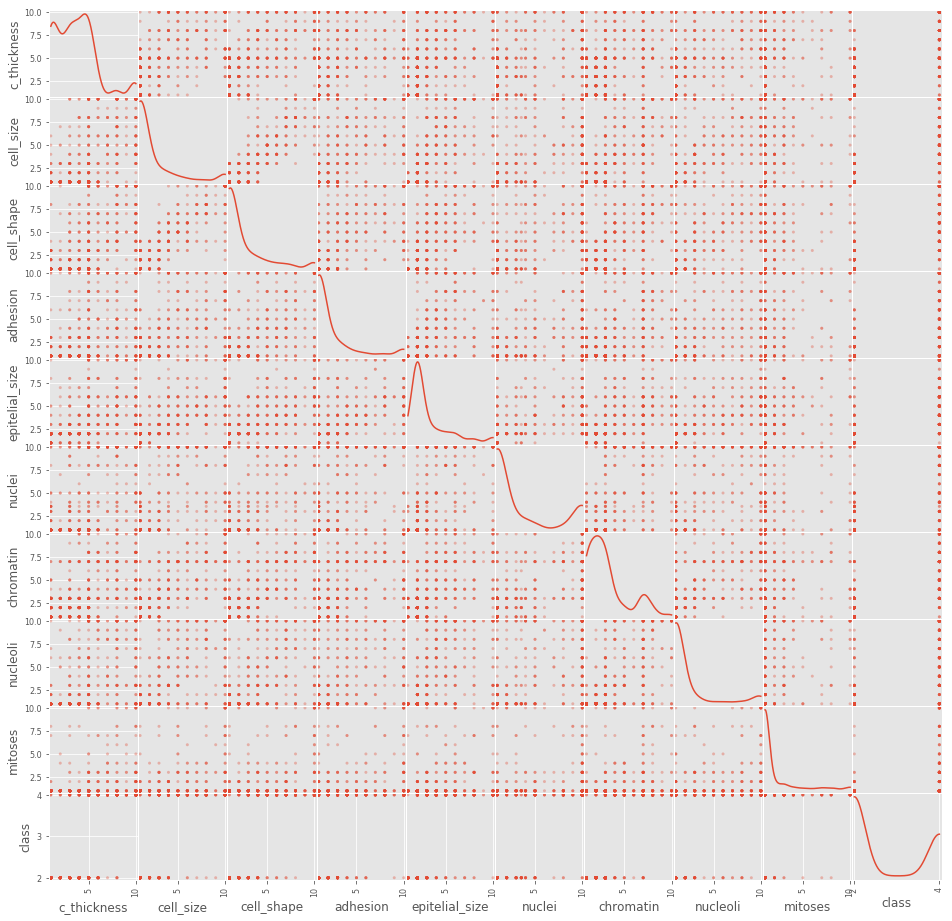

In [86]:
# Inspect the scatterplot of the data visually
scatter_matrix(dataF,alpha=0.35, figsize=(16, 16), diagonal='kde')
plt.show()

In [15]:
# Recall culumn names to plot individual scatter plots
dataF.columns

Index(['c_thickness', 'cell_size', 'cell_shape', 'adhesion', 'epitelial_size',
       'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'],
      dtype='object')

[]

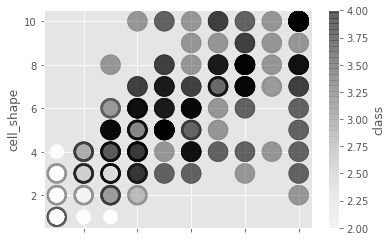

In [83]:
# From the scatter matrix there is an apparent correlation between the cell_shape and the cell_size
# I'm not sure about the meaning of the cell_shape field, how do they quantify that?
dataF.plot.scatter("cell_size","cell_shape",alpha=0.35,c='class',s=dataF['class']*100)
plt.plot()

[]

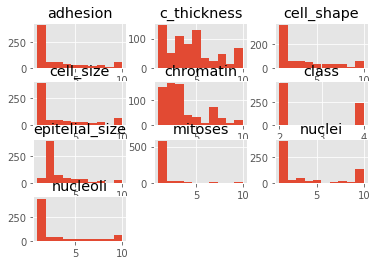

In [30]:
# It would be interesting to look the histograms for the data
dataF.hist()
plt.plot()

[]

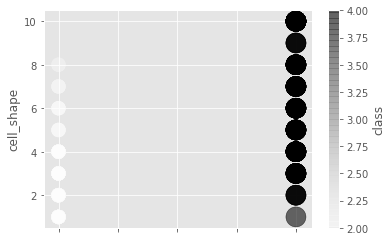

In [88]:
dataF.plot.scatter("class","cell_shape",alpha=0.35,c='class',s=dataF['class']*100)
#dataF.plot("class")
#dataF.plot("cell_shape")
plt.plot()

[]

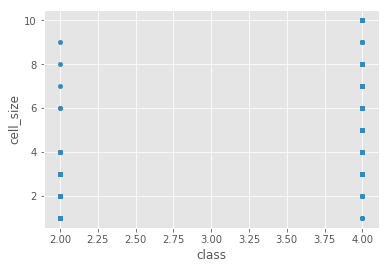

In [32]:
dataF.plot.scatter("class","cell_size")
plt.plot()

[]

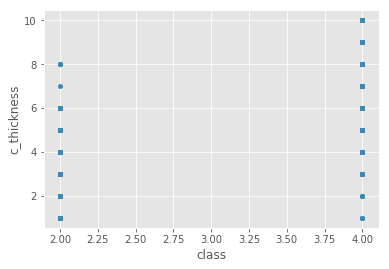

In [33]:
dataF.plot.scatter("class","c_thickness")
plt.plot()

[]

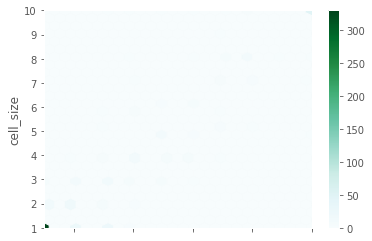

In [37]:
dataF.plot.hexbin("cell_shape","cell_size",gridsize=25)
plt.plot()

In [43]:
# import the scikit-learn stuff
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
# What's the size of my data?
dataSize = len(dataF)
dataSize

698

In [95]:
# What would be the size of ~20% of the data?
testPercent = 0.4
testSize = int(np.ceil(testPercent * len(dataF)))

testSize

280

In [90]:
## Picking a label data field
#############################

# The class tells us if the cells is malignant (4) or bening (2)
label="class"

# splitt dataframes into X and y
# X are the input parameters and y will be the predictions we would like to make
X = np.array(dataF.drop([label], 1),dtype=float)
y = np.array(dataF[label],dtype=float)

In [91]:
# scikit-learn provides a method to split data into train and tests sets
# I'm picking 80% of the data as train set and 20% as test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testPercent)

In [92]:
# Here we call a LinearRegression estimator to be trained
clf = LinearRegression()

# And use the train data to train the fitter
clf.fit(X_train, y_train)

# Here we verify the score of our fit
confidence = clf.score(X_test, y_test)
print(confidence)

0.834471684345


In [93]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
#scoring = ['precision_macro', 'recall_macro']

#scores = cross_validate(clf,X,y, scoring=scoring,cv=5, return_train_score=False)
scores = cross_validate(clf,X,y)#, return_train_score=False)
sorted(scores.keys())
#print(scores)

['fit_time', 'score_time', 'test_score', 'train_score']

In [94]:
scores["test_score"]

array([ 0.75431972,  0.81704636,  0.86561582])

In [96]:
from sklearn.linear_model import RANSACRegressor

In [105]:
#ransac = RANSACRegressor()

# And use the train data to train the fitter
#ransac.fit(X_train, y_train)

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).